<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

In [5]:
!pip install -r "C:/Users/Jasmine/Documents/Nantes/cours/M2/SVM_python/roul/cours_iae/01_SVM/td/code/requirements.txt"

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/5.0 MB ? eta -:--:--
   ------ --------------------------------- 0.8/5.0 MB 1.9 MB/s eta 0:00:03
   ---------- ----------------------------- 1.3/5.0 MB 2.0 MB/s eta 0:00:02
   -------------- ------------------------- 1.8/5.0 MB 2.1 MB/s eta 0:00:02
   ------------------ --------------------- 2.4/5.0 MB 2.2 MB/s eta 0:00:02
   ----------------------- ---------------- 2.9/5.0 MB 2.2 MB/s eta 0:00:01
   ------------------------- -------------- 3.1/5.0 MB 2.2 MB/s eta 0:00:01
   -----------

Reason for being yanked: Bug in kernel env update
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


    Found existing installation: tornado 6.2
    Uninstalling tornado-6.2:
      Successfully uninstalled tornado-6.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 24.0.1
    Uninstalling pyzmq-24.0.1:
      Successfully uninstalled pyzmq-24.0.1
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.19.1
    Uninstalling Pygments-2.19.1:
      Successfully uninstalled Pygments-2.19.1
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt_toolkit 3.0.51
    Uninstalling prompt_toolkit-3.0.51:
      Successfully uninstalled prompt_toolkit-3.0.51
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.3

## Import package

In [6]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [8]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [55]:
#1
#Import dataset from sklearn
sk_iris = datasets.load_iris()
#print(sk_iris) # array = tableau

#Si besoin
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Le dataset est constitué de 5 colonnes et de 150 lignes.

#### 2) Statistiques descriptives

  - Renommer les variables

In [56]:
print(iris.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [57]:
iris = iris.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width',
                            'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width' })

In [58]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Les colonnes sont bien renommées.

- Format des colonnes

In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Il va falloir transformer la variable "species" en integer puisque c'est notre variable cible.<br>
De plus, nous pouvons observer qu'il n'y a pas de valeurs manquantes dans le dataset.

In [60]:
iris['species'] = iris['species'] .astype('int32')

- Stats descriptives

In [61]:
iris.describe() #stats basiques 

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Au regard du tableau récapitulatif des statistiques des variables quantitatives, nous n'observons pas distribution atypique. <br>
Nous allons tout de même vérifier par les boxplots s'il n'y a effectivement pas de valeurs extrêmes.

- Etude des outliers : boxplots

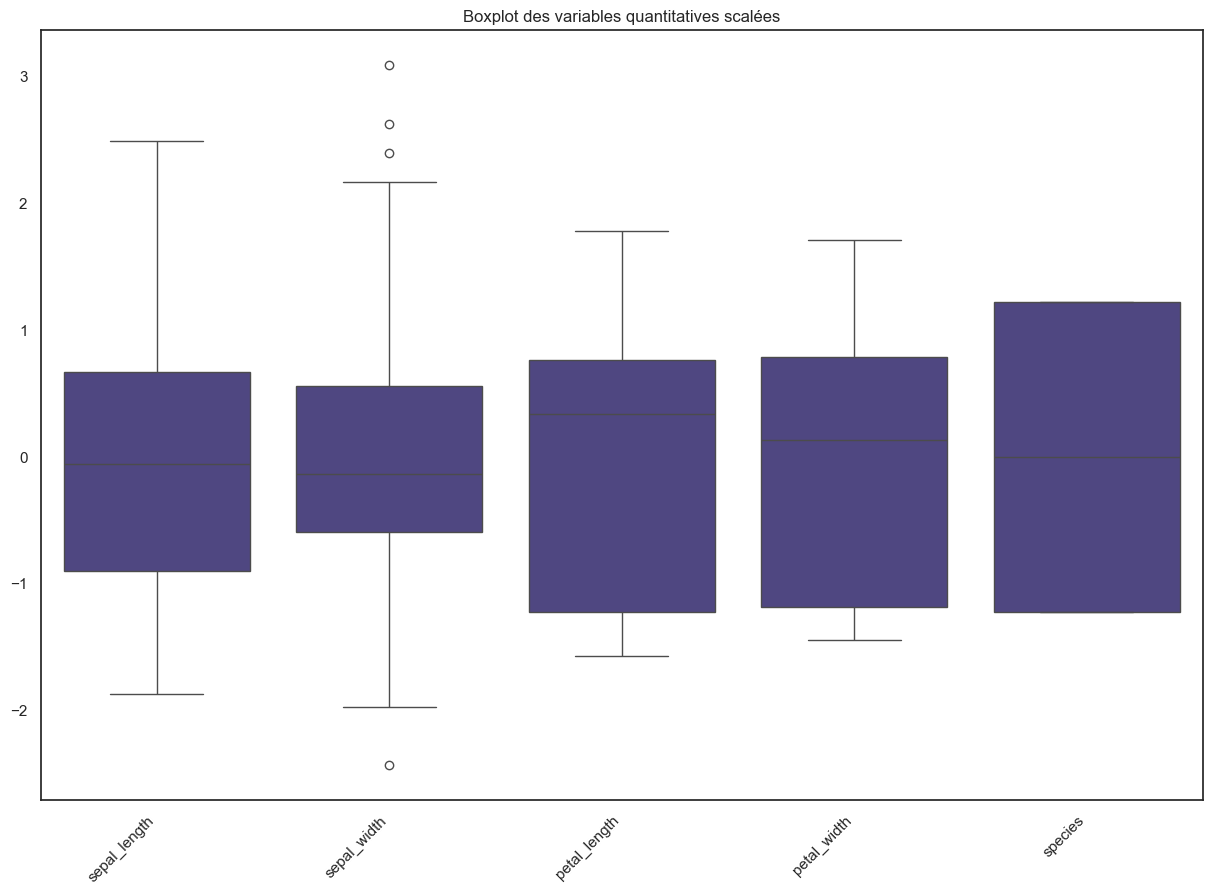

In [62]:
import seaborn as sns

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(iris), columns=iris.columns)

# Créer un boxplot pour toutes les variables numériques
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled, color='darkslateblue')
plt.title('Boxplot des variables quantitatives scalées')

plt.xticks(rotation=45, ha="right")
# Afficher le graphique
plt.show()

Les boîtes à moustaches permettent de visualiser ou non la présence de valeurs atypiques. Nous pouvons voir qu'une seule variable quantitative semble posséder des valeurs extrêmes. <br>
Le prochain travail va donc consister à les détecter.

- Détection des points atypiques

In [63]:
# Calculer les limites des boîtes à moustaches (whiskers)
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (lower_bound, upper_bound)

# Identifier les observations atypiques
outliers = {}
for column in iris.columns:
    lower_bound, upper_bound = find_outliers(iris[column])
    outliers[column] = iris[(iris[column] < lower_bound) | (iris[column] > upper_bound)]

# Afficher les observations atypiques
for column, outlier_data in outliers.items():
    print(f"Variable : {column}")
    print(outlier_data)
    print("\n")

Variable : sepal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Variable : sepal_width
    sepal_length  sepal_width  petal_length  petal_width  species
15           5.7          4.4           1.5          0.4        0
32           5.2          4.1           1.5          0.1        0
33           5.5          4.2           1.4          0.2        0
60           5.0          2.0           3.5          1.0        1


Variable : petal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Variable : petal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


Variable : species
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []




La variable concernant la largeur du sépal a bien 4 valeurs atypiques. <br>
Cependant, elles n'ont pas vraiment d'incidence sur la distribution des valeurs puisque l'écart-type est inférieur à la moyenne. Par conséquent, nous allons les conserver.

<Figure size 1500x1000 with 0 Axes>

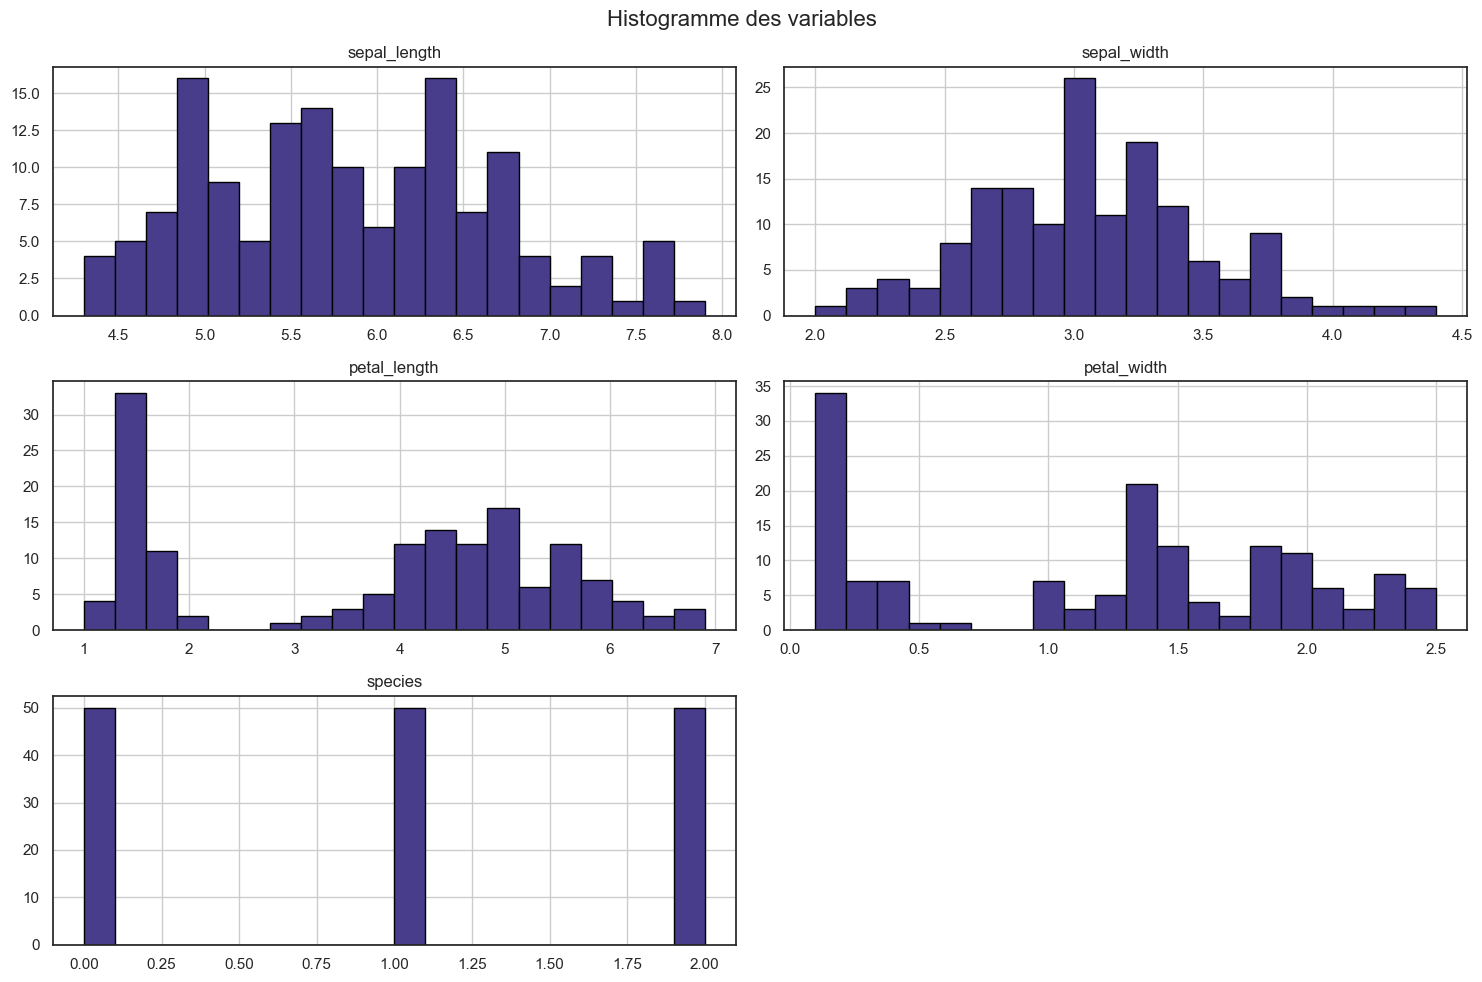

In [64]:
plt.figure(figsize=(15, 10))

iris.hist(bins=20, edgecolor='black', figsize=(15, 10), color = "darkslateblue")

plt.suptitle('Histogramme des variables', fontsize=16)
plt.tight_layout()
plt.show()

- Etude des corrélations

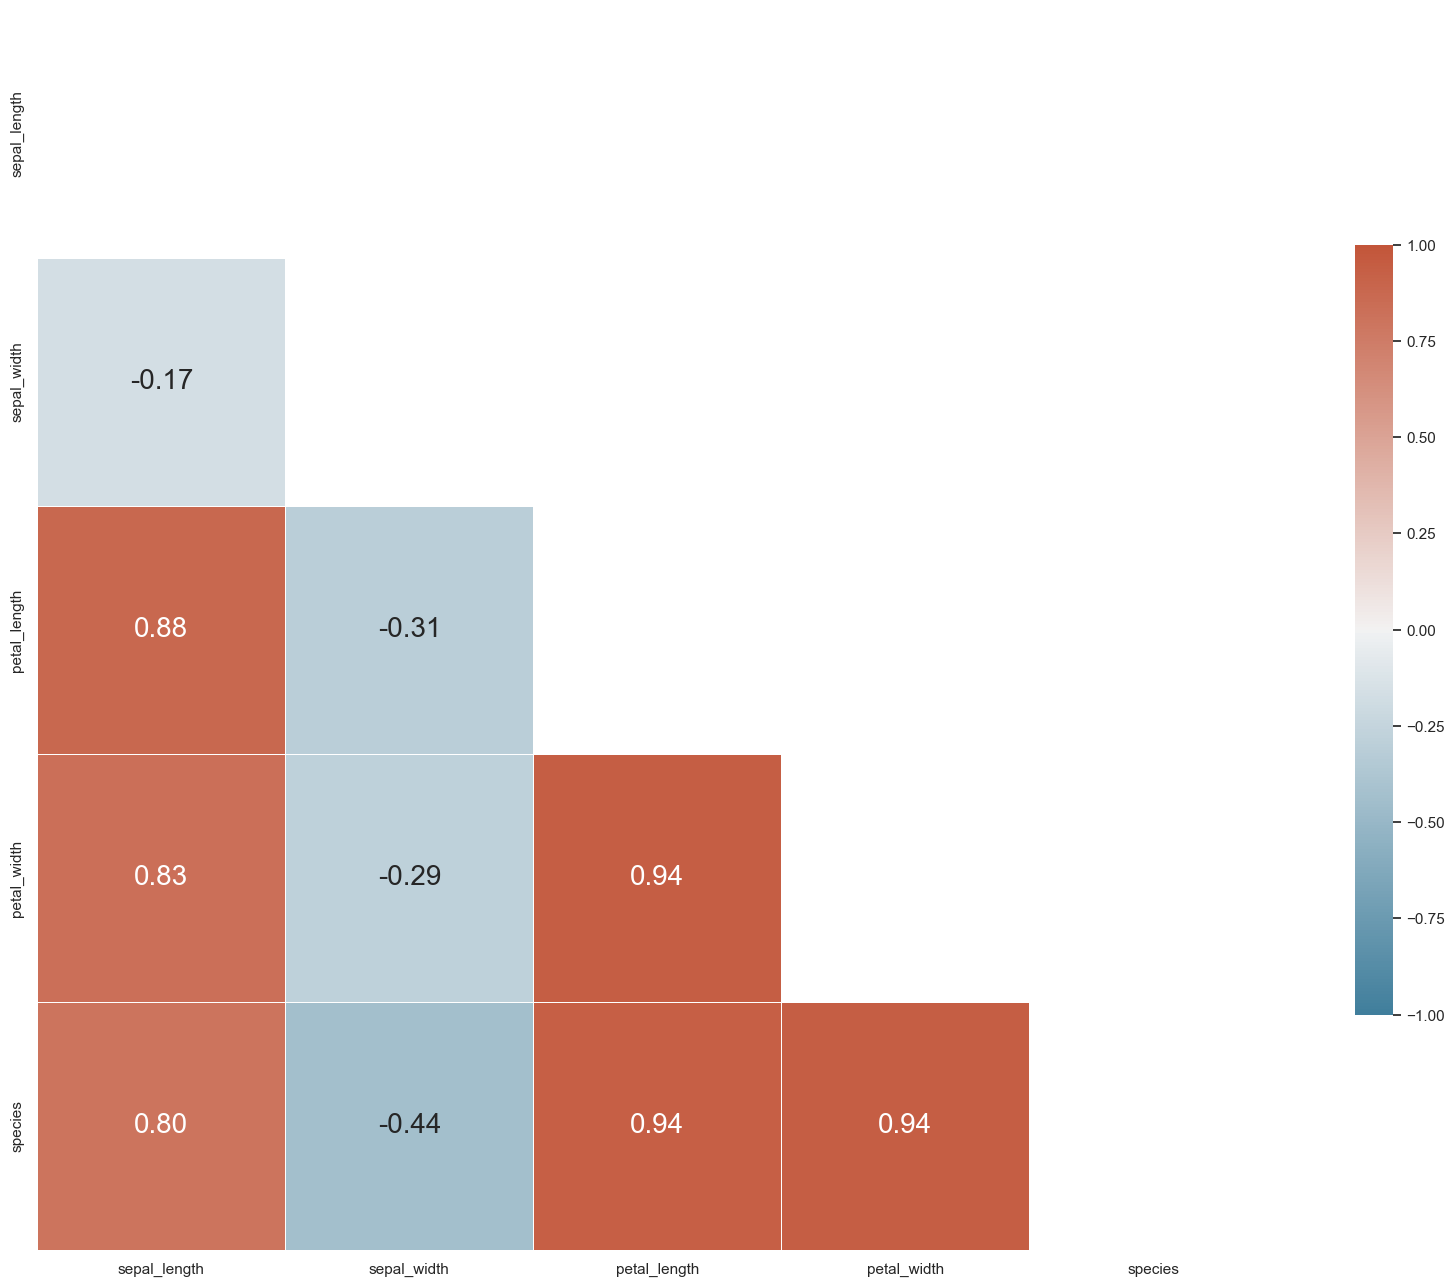

In [65]:
sns.set(style="white")

# On calcule la matrice de corrélation
corr = iris.corr(method='spearman')

# On génère un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# On crée la figure matplotlib
fig, ax = plt.subplots(figsize=(20, 20))

# Une palette de couleurs
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# On dessine la heatmap avec le masque et un ratio d'aspect
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            annot=True,
            annot_kws={"size": 20},
            fmt='.2f'
            )
plt.show()

Nous observons que notre variable cible est fortement corrélée avec toutes les variables hormis "sepal_width". <br>
De plus, cette dernière est celle qui a le moins de corrélation dans ce dataset.

### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [66]:
#iris['species'].unique() cette commande permet de voir les valeurs que prend la variable
iris = iris[iris['species'] != 2] # j'ai enlevé l'espèce qui correspondait à la modalité 2
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Le dataset contient désormais 100 lignes.

- Répartition de la variable cible

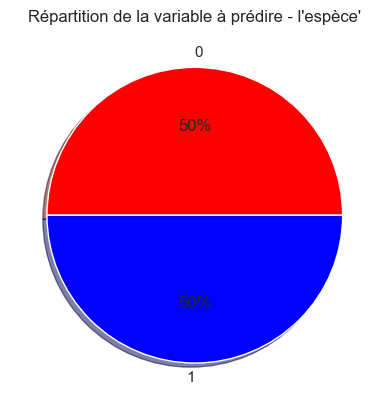

In [72]:
#Répartition de Comedy et Drama
tab_freq=iris.species.value_counts(normalize=True)


plt.pie(
    tab_freq,
    labels = tab_freq.index,
    colors=['red', 'blue'],
    autopct='%1.0f%%',
    shadow=True,)

plt.title("Répartition de la variable à prédire - l'espèce'")
plt.show()

La variable cible est équilibrée donc il n'y aura pas d'ajustement à faire.

#### 4) Découper data set en train et test

In [67]:
# Séparation des données en train et test
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train.shape # 80 observations

(80, 4)

In [ ]:
X_test.shape # 20 observations

(20, 4)

In [73]:
# standardiser les données
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns =['sepal_length', 'sepal_width','petal_length','petal_width'])
X_train_sc.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.349899,-0.588143,1.135556,0.897445
1,0.196097,-0.160403,0.852110,0.897445
2,-0.726713,0.695078,-0.919428,-0.734273
3,-1.649524,0.267338,-1.132013,-1.096877
4,0.196097,-1.229753,0.710387,0.534841


On standardise les données pour éviter les effets d'échelle. En d'autres termes, cela permet de comparer les coefficients entre eux.

#### 5) Importer les modules pour la modélisation

In [49]:
#... au début du code

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



interprétation des graphiques avec frontière du cours :
- ce qui est à l'intérieur de la frontière = ce qui est mal classifié
- les points ont les coordonnées des variables X
- 1 couleur = 1 modalité de la variable y

#### Modélisation binaire avec uniquement 2 features ⚠️

In [74]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [90]:
X_train_bis = X_train_sc[['sepal_length', 'sepal_width']]
X_test_bis = X_test[['sepal_length', 'sepal_width']]

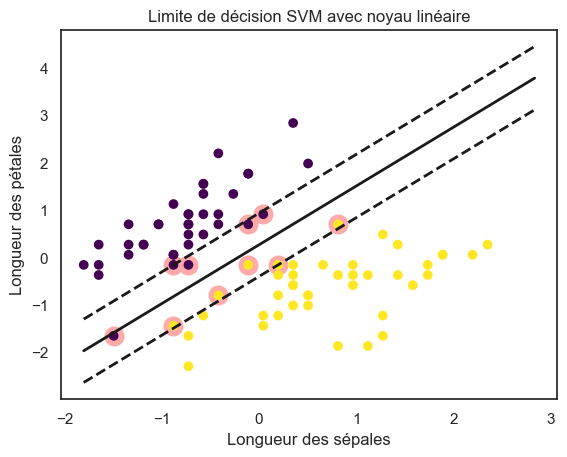

In [ ]:
# Entraîner le modèle SVM avec un noyau linéaire
model = SVC(kernel='linear', C=1) 
model.fit(X_train_bis, y_train)


plot_svc_decision_boundary(model, X_train_bis['sepal_length'].min(), X_train_bis['sepal_width'].max())

# Ajouter les données
plt.scatter(X_train_bis['sepal_length'], X_train_bis['sepal_width'], c=y_train, cmap='viridis')
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
plt.title('Limite de décision SVM avec noyau linéaire')
plt.show()

### Faire varier le critère de régularisation C

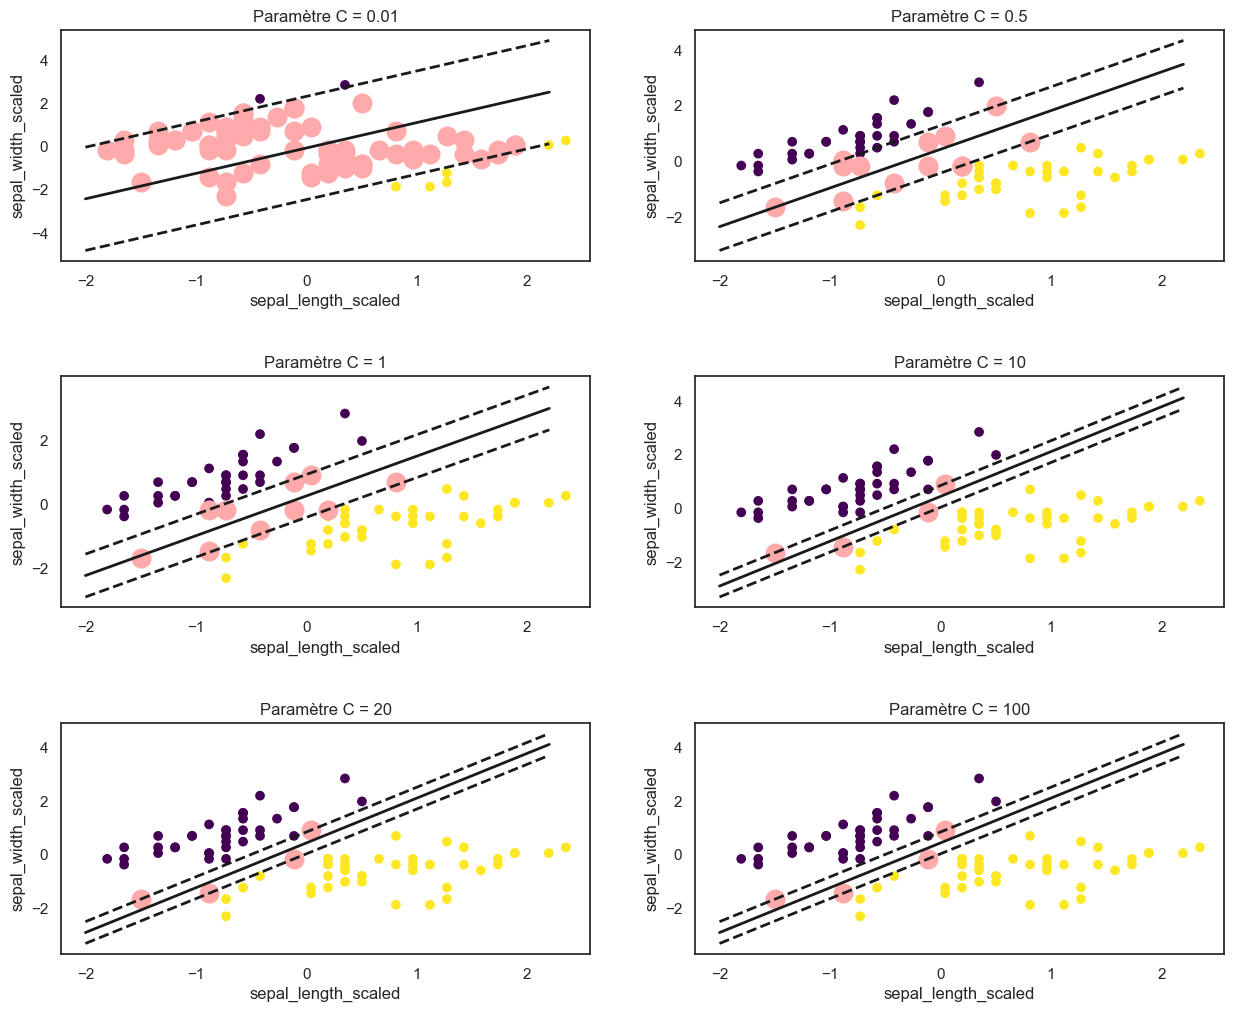

In [93]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_sc.iloc[:,0:2], y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_bis['sepal_length'], 
               X_train_bis['sepal_width'], 
                c=y_train,
                cmap="viridis"
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel('sepal_length_scaled')
    plt.ylabel('sepal_width_scaled')

##### Commenter l'effet de C

Nous pouvons observer que lorsque le paramètre C est très faible, il y a beaucoup d'erreurs de classification au vu du nombre de points qui sont à l'intérieur de la marge. <br>
A l'inverse, nous pouvons suspecter un overfitting lorsque le paramètre est élevé.

#### Changer de paire de feature

In [94]:
X_train_ter = X_train_sc[['petal_length', 'petal_width']]
X_test_ter = X_test[['petal_length', 'petal_width']]

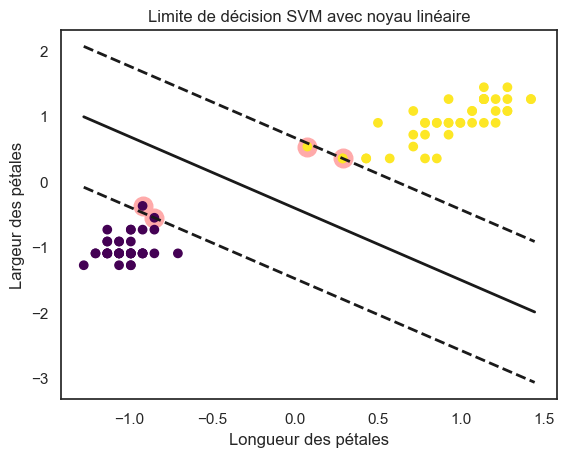

In [95]:
# Entraîner le modèle SVM avec un noyau linéaire
model_2 = SVC(kernel='linear', C=1) 
model_2.fit(X_train_ter, y_train)


plot_svc_decision_boundary(model_2, X_train_ter['petal_length'].min(), X_train_ter['petal_width'].max())

# Ajouter les données
plt.scatter(X_train_ter['petal_length'], X_train_ter['petal_width'], c=y_train, cmap='viridis')
plt.xlabel('Longueur des pétales')
plt.ylabel('Largeur des pétales')
plt.title('Limite de décision SVM avec noyau linéaire')
plt.show()

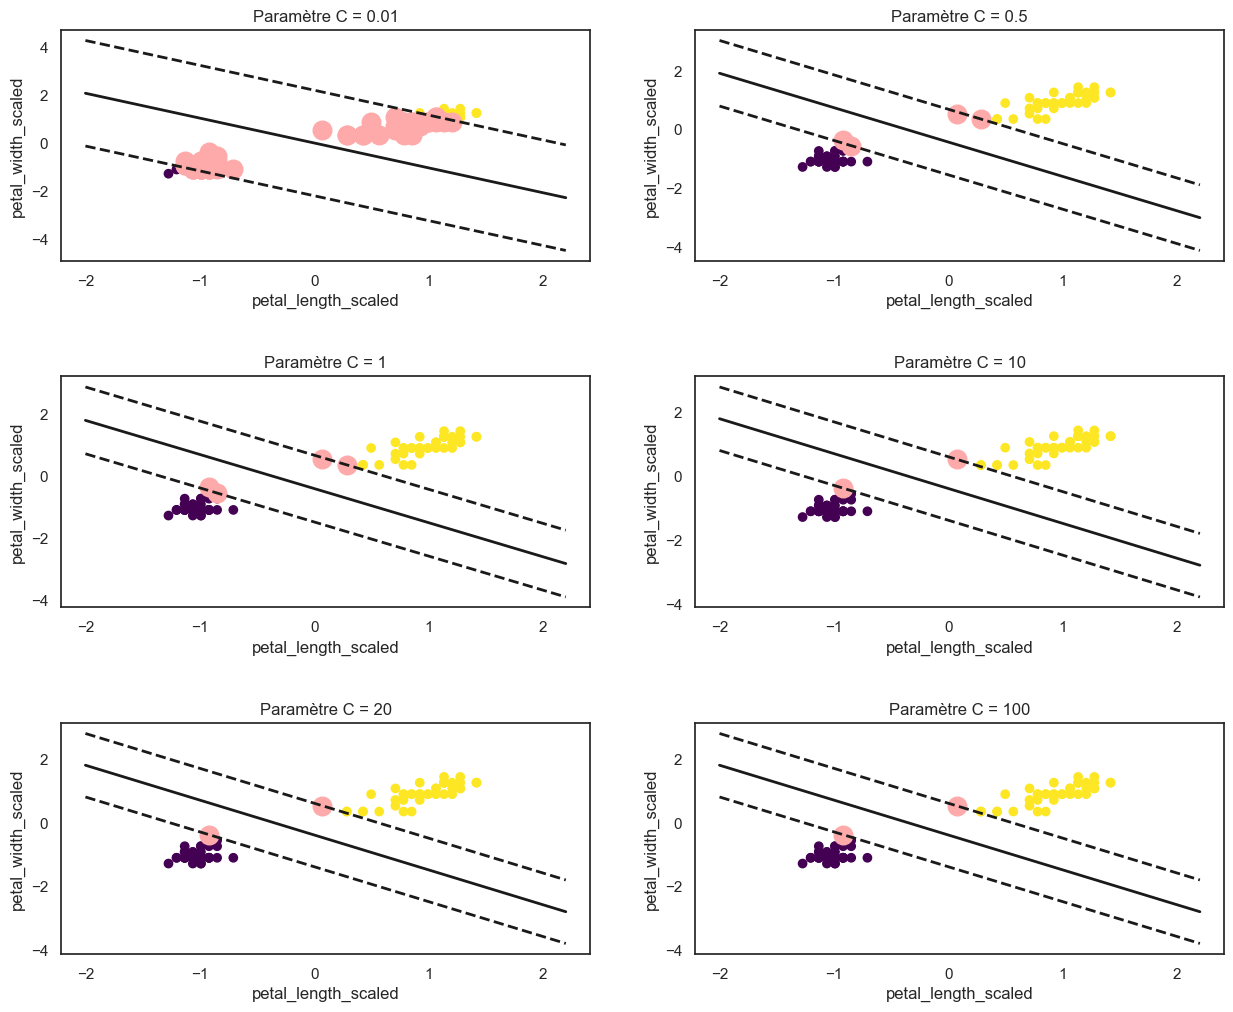

In [97]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)


for i,j  in enumerate(C):
    #Train
    class_svc = SVC(C=j , random_state=42 , kernel='linear')
    class_svc.fit(X_train_ter, y_train)
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(X_train_ter['petal_length'], 
               X_train_ter['petal_width'], 
                c=y_train,
                cmap="viridis"
               )
    plot_svc_decision_boundary(class_svc, -2, 2.2)
    plt.title('Paramètre C = '+str(j))
    plt.xlabel('petal_length_scaled')
    plt.ylabel('petal_width_scaled')

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [140]:
data = pd.read_csv('C:/Users/Jasmine/Documents/Nantes/cours/M2/SVM_python/roul/cours_iae/01_SVM/td/data/iris_noise.csv', sep=';')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
205,5.4,3.4,1.5,0.4,2
206,6.7,2.5,5.8,1.8,2
207,5.1,3.8,1.5,0.3,0
208,5.8,2.8,5.1,2.4,0


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  210 non-null    float64
 1   sepal_width   210 non-null    float64
 2   petal_length  210 non-null    float64
 3   petal_width   210 non-null    float64
 4   species       210 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.3 KB


##### Modélisation binaire, 2 target

Pareillement à précédemmment, ne mettre que 2 modalités pour la variable y (target)

In [142]:
data = data[data['species'] != 2]

In [143]:
# Séparation des données en train et test
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [144]:
# standardiser les données
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns =['sepal_length', 'sepal_width','petal_length','petal_width'])
X_train_sc.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.256841,1.757836,-1.153750,-0.778364
1,0.158056,1.544765,-0.896083,-0.942230
2,-0.256841,1.331694,-1.024916,-1.106096
3,1.126149,-0.372874,0.778752,0.696431
4,0.987850,-0.585945,1.294086,1.024163


##### Comparaison des modèles avec les paramètres par défaut

In [145]:
#Regression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sc, y_train)

#LinearSVC
l_svc= LinearSVC(random_state=42, max_iter=2000)
l_svc.fit(X_train_sc, y_train)

#SVM avec kernel linéaire
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_sc, y_train)

#SGDClassifier
sdg = SGDClassifier(loss='hinge' ,random_state=42)
sdg.fit(X_train_sc, y_train)



c:\Users\Jasmine\anaconda3\envs\SVM\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SGDClassifier(random_state=42)

#### Cross validation

In [146]:
#Regression logistique
cvs_log_reg = cross_val_score(log_reg, X_train_sc, y_train, cv=5, scoring='accuracy')

#LinearSVC
cvs_l_svc = cross_val_score(l_svc, X_train_sc, y_train, cv=5, scoring='accuracy')

#SGDClassifier
cvs_sdg = cross_val_score(sdg, X_train_sc, y_train, cv=5, scoring='accuracy')

#SVM avec kernel linéaire
cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')


c:\Users\Jasmine\anaconda3\envs\SVM\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Jasmine\anaconda3\envs\SVM\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Jasmine\anaconda3\envs\SVM\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Jasmine\anaconda3\envs\SVM\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Jasmine

In [147]:
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_log_reg,cvs_l_svc,cvs_svc,cvs_sdg]),
                        columns=['fold1','fold2','fold3','fold4','fold5'])

df_cross['model'] = ['log_reg','l_svc','svc','sgd']

In [148]:
df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.869565,0.956522,0.909091,0.818182,0.772727,log_reg
1,0.869565,0.956522,0.909091,0.818182,0.772727,l_svc
2,0.869565,0.956522,0.909091,0.818182,0.772727,svc
3,0.869565,0.956522,0.818182,0.727273,0.772727,sgd


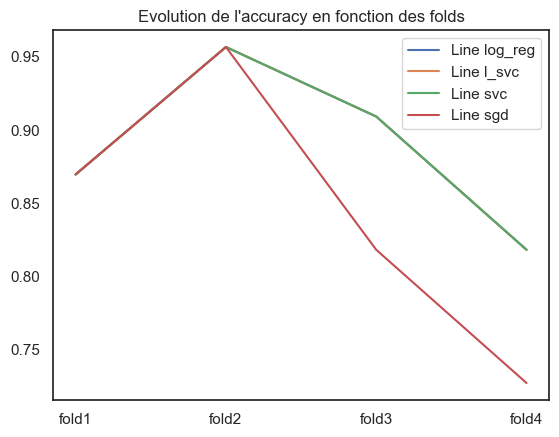

In [149]:
for row in range(df_cross.shape[0]):
    plt.plot(df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [150]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.8652173913043478 et un std : 0.07253799049457367
Le modèle N° 1 a une accuray de 0.8652173913043478 et un std : 0.07253799049457367
Le modèle N° 2 a une accuray de 0.8652173913043478 et un std : 0.07253799049457367
Le modèle N° 3 a une accuray de 0.8288537549407116 et un std : 0.08879655790606206


#### Choix du modèle, justification



J'obtiens des résultats étonnants si bien que je ne sais pas lequel se dégage le plus des autres.

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [ ]:
#Obtenir les hyperparamètres du modèle choisi en cours
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [151]:
params = {
    "kernel" : ["linear",'poly'],
    "C" : [0.5, 1, 10, 50,100,1000]
        }

c_svc = SVC(random_state=42)

In [152]:
grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, scoring='accuracy')

In [153]:
take_grid = grid_c_svc.fit(X_train_sc, y_train)

In [154]:
print("La meilleure combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleure combinaison d'estimateur est: {'C': 0.5, 'kernel': 'linear'}
pour un score de: 0.8652173913043478


Le meilleur modèle a pour valeur C=0.5

##### Learning curve

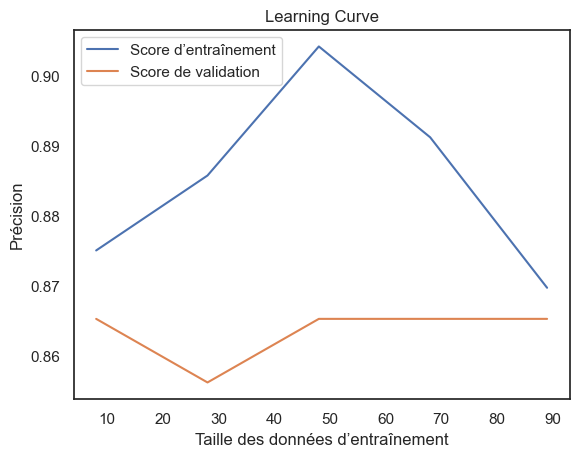

In [155]:
#Générer les learning curves
train_sizes, train_scores, test_scores = learning_curve(take_grid.best_estimator_, X_train_sc, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Score d’entraînement')
plt.plot(train_sizes, test_mean, label='Score de validation')
plt.title('Learning Curve')
plt.xlabel('Taille des données d’entraînement')
plt.ylabel('Précision')
plt.legend()
plt.show()

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [156]:
best_svc = SVC(random_state=42, C=0.5, kernel='linear')

In [157]:
best_svc.fit(X_train_sc, y_train)

SVC(C=0.5, kernel='linear', random_state=42)

#### Commenter la qualité de la prédiction

In [158]:
print('Training score: ' + str(best_svc.score(X_train_sc,y_train)), 
      '\n',
      'Test score: ' + str(best_svc.score(X_test, y_test))
     )

Training score: 0.8660714285714286 
 Test score: 0.42857142857142855


Avec un training score de 87% et un test score de 43%, on pourrait suspecter un underfitting de notre modèle.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [ ]:
print('Training score: ' + str(best_svc.score(X_train_sc,y_train)), 
      '\n',
      'Test score: ' + str(best_svc.score(X_test, y_test))
     )

Avec un training score de 87% et un test score de 43%, on pourrait suspecter un underfitting de notre modèle.

#### Influence de vos features sur le modèle

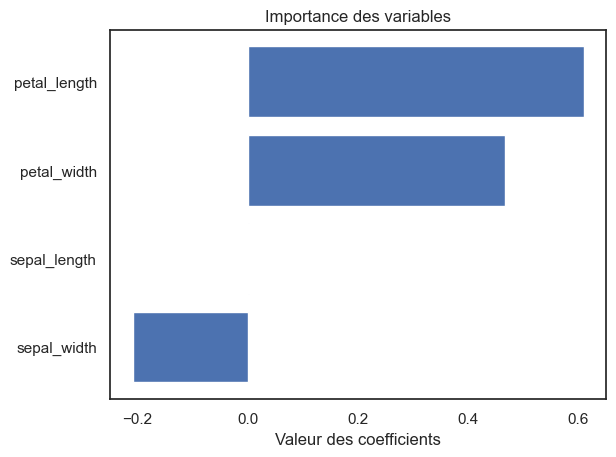

In [160]:
plt.title('Importance des variables')
plt.xlabel('Valeur des coefficients')
svm_f_importances(best_svc.coef_[0], X_train_sc.columns)

Les variables les plus influentes concernent les pétales. Cependant, mes résultats ne sont pas très fiables.

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

3) Existe-t-il des différences entre OVO et OVR?

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>